age,workclass,education,marital.status,occupation,race,sex,hours.per.week,native.country,income
2,5,2,2,0,0,0,3,0,0
3,1,2,0,0,0,0,0,0,0
2,0,2,1,1,0,0,3,0,0
4,0,1,0,1,4,0,3,0,0
1,0,2,0,3,4,1,3,1,0
2,0,3,0,0,0,1,3,0,0


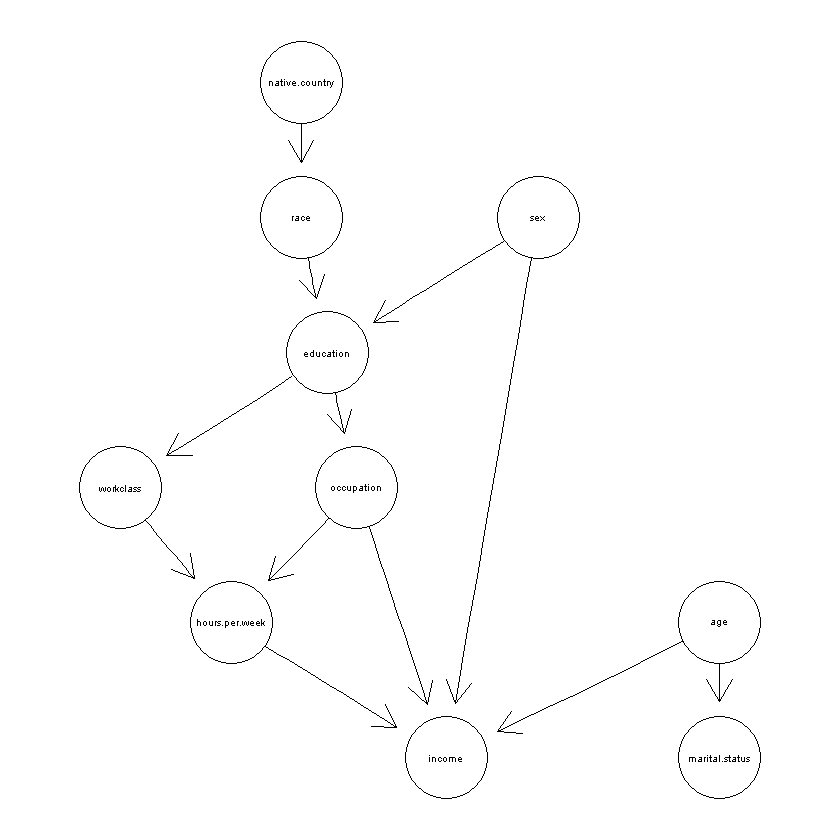

In [7]:
library("gRain")
library("Rgraphviz")
library("dagitty")
library("combinat")

options(warn=-1)
#setwd("/Users/apple1/Dropbox/Uni/Nijmegen/WS17_18/BN")
setwd("D:/RU/Sem1/Bayesian Networks/Project")
data <- read.table(header=T, sep=",", 'adult_cleaned.csv')


our_network <- dag(~ race:native.country + education:race:sex + workclass:education + hours.per.week:workclass:occupation + occupation:education + marital.status:age + income:age:sex:occupation:hours.per.week)
plot(our_network)
head(data)

data[data=="?"]<-NA
data<-data[complete.cases(data),]

In [2]:
g <- dagitty( "dag{ native.country -> race -> education -> occupation -> hours.per.week -> income; occupation -> income; education -> workclass -> hours.per.week; sex -> education; sex -> income; age -> income; age -> marital.status}" )

In [3]:
independencies <- impliedConditionalIndependencies( g )

In [ ]:
print(independencies)

In [ ]:
nrow(subset(data, data[,xyz[3]] == comb_strata[1,]))

In [ ]:
xyz[-(1:2)]

In [ ]:
length(expand.grid(strata)[1,])

In [46]:
strata
comb_strata
xyz
test_strata <- order(table(comb_strata[,xyz[-(1:2)]]),decreasing=T)
#test_strata <- order(table(data[,xyz[-(1:2)]]),decreasing=T)
table(data[,xyz[-(1:2)]])
test_strata
tmp <- matrix(test_strata,nrow=dim(table(data[,xyz[-(1:2)]]))[1],ncol=dim(table(data[,xyz[-(1:2)]]))[2],byrow=TRUE)
tmp
which(table(data[,xyz[-(1:2)]])==max(table(data[,xyz[-(1:2)]])))

[[1]]
[1] 3 4 2 5 1 0
Levels: 3 4 2 5 1 0

[[2]]
[1] 1 0 2 3 5 4
Levels: 1 0 2 3 5 4

[[3]]
[1] 0 1
Levels: 0 1

Var1,Var2,Var3
3,1,0
4,1,0
2,1,0
5,1,0
1,1,0
0,1,0
3,0,0
4,0,0
2,0,0
5,0,0


9.X              9.Y             9.Z1             9.Z2 
     "education"         "income" "hours.per.week"     "occupation" 
            9.Z3 
           "sex"

ERROR: Error in `[.data.frame`(comb_strata, , xyz[-(1:2)]): undefined columns selected


In [18]:
num_test <- 0
all <- length(data[,1])
for(i in 1:length(independencies)){
    indp <- independencies[i]
    xyz <- unlist(indp)
    #print(xyz)
    if(length(xyz)>3){

    }
    if(length(xyz)==2){
        #print(paste('test: ', xyz[1], ' and ', xyz[2]))
        tst <- chisq.test(data[,xyz[1]], data[,xyz[2]])
        res <- sqrt(max((tst$statistic - tst$parameter)/(( nrow(data) - 1)*tst$parameter),0))
        if(res > 0.05){
            #print(xyz)
            print(paste('test: ', xyz[1], ' and ', xyz[2]))
            print(res)
        }
        num_test <- num_test + 1
    }
    else{
        print(paste('test ', xyz[1], ' and ', xyz[2], 'given ', xyz[-(1:2)]))
        strata <- list()
        for(i in 1:length(xyz[-(1:2)])){
                strata[i] <- as.data.frame(sort(table(data[,xyz[2+i]]),decreasing=T))
        }
        comb_strata = expand.grid(strata)
        #strata <- as.data.frame(sort(table(data[,xyz[3]]),decreasing=T))
        visited <- 0
        idx <- 1
        #all <- sum(strata['Freq'])
        while(visited<0.8*all){
            #print(paste(xyz[-(1:2)], ' = ', comb_strata[idx,]),max.levels=0)
            
            
            #subdata <- subset(data, data[,xyz[3]] == strata[idx,1])
            subdata <- data[interaction(data[,xyz[-(1:2)]]) == interaction(comb_strata[idx,]),]
            x <- subdata[,xyz[1]]
            y <- subdata[,xyz[2]]
            if(length(unique(x)) < 2 || length(unique(y)) < 2){
                break
            }
            tst <- chisq.test(x,y)
            res <- sqrt(max((tst$statistic - tst$parameter)/(( nrow(subdata) - 1)*tst$parameter),0))
            if(res > 0.05){
                #print(xyz)
                #print(paste('test ', xyz[1], ' and ', xyz[2], 'given ', t(xyz[-(1:2)])),max.levels=0)
                print(paste(xyz[-(1:2)], ' = ', comb_strata[idx,]),max.levels=0)
                print(res)
            }
            
            visited <- visited + nrow(subdata)
            idx <- idx + 1
            num_test <- num_test + 1
        }
    }
}

[1] "test:  age  and  hours.per.week"
[1] 0.07403111
[1] "test  education  and  hours.per.week given  occupation"
[2] "test  education  and  hours.per.week given  workclass" 
[1] "occupation  =  4" "workclass  =  1" 
[1] 0.06275108
[1] "test  education  and  income given  hours.per.week"
[2] "test  education  and  income given  occupation"    
[3] "test  education  and  income given  sex"           
[1] "hours.per.week  =  1" "occupation  =  1"     "sex  =  1"           
[1] 0.05570996
[1] "hours.per.week  =  2" "occupation  =  1"     "sex  =  1"           
[1] 0.0580566
[1] "hours.per.week  =  6" "occupation  =  1"     "sex  =  1"           
[1] 0.1284068
[1] "hours.per.week  =  1" "occupation  =  2"     "sex  =  1"           
[1] 0.09366923
[1] "hours.per.week  =  2" "occupation  =  2"     "sex  =  1"           
[1] 0.1034253
[1] "hours.per.week  =  3" "occupation  =  2"     "sex  =  1"           
[1] 0.06778869
[1] "hours.per.week  =  4" "occupation  =  2"     "sex  =  1"           

In [15]:
num_test

[1] 219

In [ ]:
net1 <- compile( grain( our_network, data, smooth=1 ) )

In [ ]:
pp <- extractCPT( data, our_network, smooth=1)

In [ ]:
querygrain(net1, nodes='income',type = "marginal", evidence = NULL, exclude = TRUE, normalize = TRUE, result = "array", details = 0)

In [ ]:
table(data['income'])

In [ ]:
24720 / (24720+7841)